In [1]:
import numpy as np
from pprint import pprint
from copy import deepcopy


from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
#from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.device import DeviceSetup




descriptor = generate_descriptor(
    #pqsc=[""], # 장비 여러개 사용시
    shfqc_6=["DEV12256"],
    number_data_qubits=6,
    multiplex=True,
    number_multiplex=6,
    include_cr_lines=True,
    include_ef_lines=True,
    get_zsync=False,  # Only set to True when using real device
    save = True,
    filename="TG_RIP_2",
    ip_address="192.168.0.83"
)


#descriptor
setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="192.168.0.83")
#setup
setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
#setup.instruments

In [2]:
from laboneq.simple import Session
session = Session(setup)
session.connect(ignore_version_mismatch=False, do_emulation=False)
#session.disconnect()

[2026.01.05 21:20:48.933] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is /home/yalgaeahn/JSAHN/qubit-experiment/examples/selectiveRIP/laboneq_output/log
[2026.01.05 21:20:48.935] INFO    VERSION: laboneq 25.10.3
[2026.01.05 21:20:48.937] INFO    Connecting to data server at 192.168.0.83:8004
[2026.01.05 21:20:48.952] INFO    Connected to Zurich Instruments LabOne Data Server version 25.10.1.4 at 192.168.0.83:8004
[2026.01.05 21:20:48.974] INFO    Configuring the device setup
[2026.01.05 21:20:48.992] INFO    The device setup is configured


In [3]:
from qpu_types import TransmonQubit, TransmonQubitParameters
from helper import load_qubit_parameters, save_qubit_parameters
from operations import TransmonOperations
from laboneq.dsl.quantum.qpu import QPU, QuantumPlatform


_loaded_qubits = load_qubit_parameters(filename="latest") 
#qubits = TransmonQubit.from_device_setup(setup) # Also can be done with load_qubit_parameters 
qubits = list(_loaded_qubits.values())


qpu = QPU(quantum_elements=qubits, quantum_operations=TransmonOperations())
#quantum_platform = QuantumPlatform(setup=setup, qpu=qpu)

# qpu.topology.add_edge("bus", "q16", "q117")
# qpu.topology.add_edge("bus", "q17", "q18")
# qpu.topology.add_edge("bus", "q18", "q19")
# qpu.topology.plot()




from laboneq.simple import workflow
folder_store = workflow.logbook.FolderStore("./experiment_store") 
folder_store.activate()
#folder_store.deactivate()
#workflow.logbook.LoggingStore().activate()
#workflow.logbook.LogbookStore().deactivate()


LOADED:./qubit_parameters/20260105-2039_sample2.json


In [ ]:
# from experiments import rip4

# #q = qubits[1]
# #temporary_parameters = q.parameters.copy()

# #######################################################################

# #######################################################################
# options = rip4.experiment_workflow.options()
# options.update(False)

# #print(workflow.show_fields(options))

# ###################################################################
# bus_freq = qubits[2].parameters.resonance_frequency_ge - 45e6+26e6 
# bus_amp = 1.0

# bus2_freq = qubits[4].parameters.resonance_frequency_ge - 9e6  
# bus2_amp = 0.0

# rip_drive_controlg = rip4.experiment_workflow(
#     session=session,
#     qpu=qpu,
#     ctrl=qubits[1],
#     targ=qubits[0],
#     bus=qubits[2], #mode1 
#     bus2=qubits[4], #mode3 
#     bus_frequency=bus_freq,
#     bus_amplitude=bus_amp,
#     bus2_frequency=bus2_freq,
#     bus2_amplitude=bus2_amp,
#     delays=np.linspace(350e-9, 500e-9, 151),
#     detunings=0,
#     c_prep = "g",
#     options=options 
# )
# rip_drive_controle = rip4.experiment_workflow(
#     session=session,
#     qpu=qpu,
#     ctrl=qubits[1],
#     targ=qubits[0],
#     bus=qubits[2],
#     bus2=qubits[4],
#     bus_frequency=bus_freq,
#     bus_amplitude=bus_amp,
#     bus2_frequency=bus2_freq,
#     bus2_amplitude=bus2_amp,
#     delays=np.linspace(350e-9, 500e-9, 151),
#     detunings=0,
#     c_prep = "e",
#     options=options 
# )

# rip_result_control_g = rip_drive_controlg.run()
# rip_result_control_e = rip_drive_controle.run()
# #qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
# #print(drag_result.tasks['analysis_workflow'].output)

In [ ]:
# from laboneq.simple import show_pulse_sheet
# from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

# show_pulse_sheet(compiled_experiment=rip_result_control_e.tasks["compile_experiment"].output,name='test', interactive=True)
# #plot_simulation(compiled_experiment=rip_result_control_e.tasks["compile_experiment"].output)

In [23]:
qubits[4].parameters.resonance_frequency_ge # mode1

6420000000.0

# RIP echo

In [20]:
from experiments import rip_echo

#q = qubits[1]
#temporary_parameters = q.parameters.copy()

#######################################################################

#######################################################################
options = rip_echo.experiment_workflow.options()
options.update(False)

#print(workflow.show_fields(options))

###################################################################
bus_freq = qubits[2].parameters.resonance_frequency_ge - 13e6#45e6+26e6 
bus_amp = 0.45

bus2_freq = qubits[4].parameters.resonance_frequency_ge - 9e6  
bus2_amp = 0.0

rip_echo_controlg = rip_echo.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2], #mode1 
    bus2=qubits[4], #mode3 
    bus_frequency=bus_freq,
    bus_amplitude=bus_amp,
    bus2_frequency=bus2_freq,
    bus2_amplitude=bus2_amp,
    delays=np.linspace(80e-9, 2400e-9, 200),
    detunings=0,
    c_prep = "g",
    options=options 
)
rip_echo_controle = rip_echo.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2],
    bus2=qubits[4],
    bus_frequency=bus_freq, 
    bus_amplitude=bus_amp,
    bus2_frequency=bus2_freq,
    bus2_amplitude=bus2_amp,
    delays=np.linspace(80e-9, 2400e-9, 200),
    detunings=0,
    c_prep = "e",
    options=options 
)

rip_echo_result_control_g = rip_echo_controlg.run()
rip_echo_result_control_e = rip_echo_controle.run()


[2026.01.05 21:35:04.962] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.05 21:35:04.963] INFO      Workflow 'rip_echo': execution started at 2026-01-05 12:35:04.962515Z         
[2026.01.05 21:35:04.963] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.05 21:35:04.972] INFO    Task 'temporary_qpu': started at 2026-01-05 12:35:04.972283Z
[2026.01.05 21:35:04.973] INFO    Task 'temporary_qpu': ended at 2026-01-05 12:35:04.973324Z
[2026.01.05 21:35:04.975] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2026-01-05 
[2026.01.05 21:35:04.975] INFO    12:35:04.975404Z
[2026.01.05 21:35:04.976] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2026-01-05 12:35:04.976197Z
[2026.01.05 21:35:04.977] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2026-01-05 
[2026.01.05 21:35:04.977] INFO    12:35:04.976920Z
[2026.01.05 21:35:04.977] INFO    Task 'temporar

In [8]:
# from laboneq.simple import show_pulse_sheet
# from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

# show_pulse_sheet(compiled_experiment=rip_echo_result_control_e.tasks["compile_experiment"].output,name='test', interactive=True)
# #plot_simulation(compiled_experiment=rip_result_control_e.tasks["compile_experiment"].output)

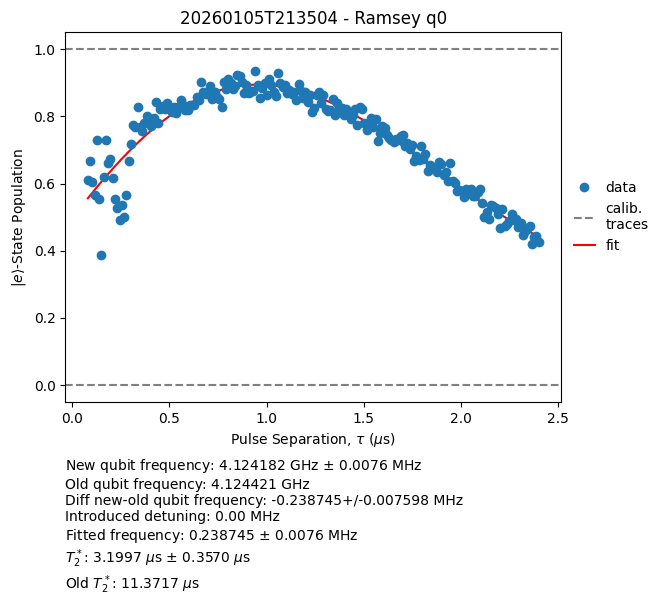

In [21]:
rip_echo_result_control_g.tasks['analysis_workflow'].tasks['plot_population'].output['q0']
#rip_echo_result_control_e.tasks['analysis_workflow'].tasks['plot_population'].output['q0']


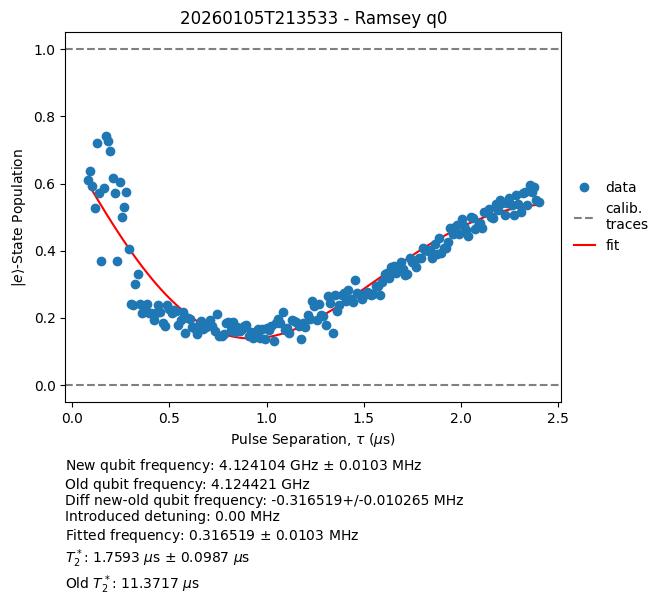

In [22]:
rip_echo_result_control_e.tasks['analysis_workflow'].tasks['plot_population'].output['q0']             

# RIP4

q2 for mode 1


- drive lo 5.4
- 5.4945

In [ ]:
qubits[2].parameters 

In [ ]:
qubits[0].parameters.readout_resonator_frequency
#qubits[1].parameters.readout_resonator_frequency

qubits[0].parameters.readout_lo_frequency = 7.4e9


qubits[4].parameters.readout_lo_frequency = 7.4e9


qubits[2]

In [ ]:
from experiments import rip4

#q = qubits[1]
#temporary_parameters = q.parameters.copy()

#######################################################################

#######################################################################
options = rip4.experiment_workflow.options()
options.update(False)

#print(workflow.show_fields(options))

###################################################################
bus_freq = qubits[2].parameters.resonance_frequency_ge - 13e6  #45e6+26e6 
bus_amp = 0.6

bus2_freq = qubits[4].parameters.resonance_frequency_ge - 9e6  
bus2_amp = 0.0

rip_drive_controlg = rip4.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2], #mode1 
    bus2=qubits[4], #mode3 
    bus_frequency=bus_freq,
    bus_amplitude=bus_amp,
    bus2_frequency=bus2_freq,
    bus2_amplitude=bus2_amp,
    delays=np.linspace(80e-9, 1200e-9, 180),
    detunings=0,
    c_prep = "g",
    options=options 
)
rip_drive_controle = rip4.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2],
    bus2=qubits[4],
    bus_frequency=bus_freq,
    bus_amplitude=bus_amp,
    bus2_frequency=bus2_freq,
    bus2_amplitude=bus2_amp,
    delays=np.linspace(80e-9, 1200e-9, 180),
    detunings=0,
    c_prep = "e",
    options=options 
)

rip_result_control_g = rip_drive_controlg.run()
rip_result_control_e = rip_drive_controle.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
#print(drag_result.tasks['analysis_workflow'].output)

In [ ]:
rip_data_control_g = rip_result_control_g.output
rip_data_control_e = rip_result_control_e.output

In [ ]:
duration = rip_data_control_g.data['q0']['result'].axis[0][0]


phase_control_g = rip_data_control_g.data['q0']['result'].data
phase_control_e = rip_data_control_e.data['q0']['result'].data




In [ ]:
import matplotlib.pyplot as plt

control_g_g_point = rip_data_control_g.data['q0']['cal_trace'].g.data
control_g_e_point = rip_data_control_g.data['q0']['cal_trace'].e.data

control_e_g_point = rip_data_control_e.data['q0']['cal_trace'].g.data
control_e_e_point = rip_data_control_e.data['q0']['cal_trace'].e.data


plt.figure(figsize=(6,6))

plt.scatter(control_g_g_point.real, control_g_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_g_e_point.real, control_g_e_point.imag, color="blue", label="|1> reference (e)")
plt.scatter(control_e_g_point.real, control_e_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_e_e_point.real, control_e_e_point.imag, color="blue", label="|1> reference (e)")

plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.legend()

In [ ]:
def normalize_population(points, g, e):
    """
    points: list or numpy array of complex numbers
    return: array of normalized values in [0,1]
    """
    points = np.array(points, dtype=complex)
    d0 = np.abs(points - g)
    d1 = np.abs(points - e)
    return d0 / (d0 + d1)

new_phase_control_g = []
new_phase_control_e = []

for i in range(len(phase_control_g)):
    # 2. Calculate the value and append it to the new row
    normalized_value = normalize_population(phase_control_g[i], control_g_g_point, control_g_e_point)
    new_phase_control_g.append(normalized_value)
for k in range(len(phase_control_e)):
    # 2. Calculate the value and append it to the new row
    normalized_value = normalize_population(phase_control_e[k], control_e_g_point, control_e_e_point)
    new_phase_control_e.append(normalized_value)
# 3. Append the completed row to the main population list

population_control_g = new_phase_control_g
population_control_e = new_phase_control_e
plt.figure(figsize=(8,6))
plt.plot(duration, population_control_g, color="#ff5500", label = r'control: |g>')
plt.plot(duration, population_control_e, color="#0055aa", label = r'control: |e>')
plt.ylim([-0.1,1.1])
plt.xlabel("RIP duration (s)", fontsize=16)
plt.ylabel("population", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=14)


# RIP5

In [ ]:
# from experiments import rip5

# #q = qubits[1]
# #temporary_parameters = q.parameters.copy()

# #######################################################################

# #######################################################################
# options = rip5.experiment_workflow.options()
# options.update(False)

# #print(workflow.show_fields(options))

# ###################################################################
# bus_freq = qubits[2].parameters.resonance_frequency_ge - 20e6#45e6+26e6 
# bus_amp = 1.0

# bus2_freq = qubits[4].parameters.resonance_frequency_ge - 9e6  
# bus2_amp = 0.0

# rip_drive_controlg = rip5.experiment_workflow(
#     session=session,
#     qpu=qpu,
#     ctrl=qubits[1],
#     targ=qubits[0],
#     bus=qubits[2], #mode1 
#     bus2=qubits[4], #mode3 
#     bus_frequency=bus_freq,
#     bus_amplitude=bus_amp,
#     bus2_frequency=bus2_freq,
#     bus2_amplitude=bus2_amp,
#     delays=np.linspace(800e-9, 5000e-9, 301),
#     detunings=-22e6,
#     c_prep = "g",
#     options=options 
# )
# # rip_drive_controle = rip5.experiment_workflow(
# #     session=session,
# #     qpu=qpu,
# #     ctrl=qubits[1],
# #     targ=qubits[0],
# #     bus=qubits[2],
# #     bus2=qubits[4],
# #     bus_frequency=bus_freq,
# #     bus_amplitude=bus_amp,
# #     bus2_frequency=bus2_freq,
# #     bus2_amplitude=bus2_amp,
# #     delays=np.linspace(300e-9, 1500e-9, 145),
# #     detunings=0,
# #     c_prep = "e",
# #     options=options 
# # )

# rip5_result_control_g = rip_drive_controlg.run()
# #rip5_result_control_e = rip_drive_controle.run()
# #qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
# #print(drag_result.tasks['analysis_workflow'].output)

In [ ]:
rip5_result_control_g.tasks['analysis_workflow'].tasks['plot_population'].output['q0']



In [ ]:
rip5_result_control_e.tasks['analysis_workflow'].tasks['plot_population'].output['q0']

In [ ]:
g_freq = rip5_result_control_g.tasks['analysis_workflow'].output['new_parameter_values']['q0']['resonance_frequency_ge']
e_freq = rip5_result_control_e.tasks['analysis_workflow'].output['new_parameter_values']['q0']['resonance_frequency_ge']
old_g_freq = rip5_result_control_g.tasks['analysis_workflow'].output['old_parameter_values']['q0']['resonance_frequency_ge']
old_e_freq = rip5_result_control_e.tasks['analysis_workflow'].output['old_parameter_values']['q0']['resonance_frequency_ge']

detun_g = g_freq - old_g_freq
detun_e = e_freq - old_e_freq

detune = (detun_g+detun_e )/2 
detune #= -8114780.064202309

In [ ]:
detun_g = g_freq - old_g_freq
detun_e = e_freq - old_e_freq


detune = (detun_g+detun_e )/2 
detune #= -8114780.064202309

In [ ]:
from laboneq.simple import show_pulse_sheet
from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

show_pulse_sheet(compiled_experiment=rip5_result_control_e.tasks["compile_experiment"].output,name='test', interactive=True)
#plot_simulation(compiled_experiment=rip5_result_control_e.tasks["compile_experiment"].output)

# SAVE

In [ ]:
from helper import load_qubit_parameters, save_qubit_parameters
save_qubit_parameters(qubits={ qubit.uid : qubit for qubit in qubits}, save_folder="./qubit_parameters/", filename="sample2")